In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 18s 0us/step


In [3]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
# Create the base VGG-16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 4s 0us/step


In [6]:
# Freeze the base model layers
base_model.trainable = False

In [7]:
# Create a new model on top of the base model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    
])

In [8]:
# view the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Augment the training data
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

In [10]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                    steps_per_epoch=len(X_train) // 128,
                    epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
390/390 [==============================] - 42s 83ms/step - loss: 1.5152 - accuracy: 0.4720 - val_loss: 1.3152 - val_accuracy: 0.5417
Epoch 2/10
390/390 [==============================] - 30s 78ms/step - loss: 1.3295 - accuracy: 0.5363 - val_loss: 1.2446 - val_accuracy: 0.5659
Epoch 3/10
390/390 [==============================] - 31s 80ms/step - loss: 1.2879 - accuracy: 0.5471 - val_loss: 1.2399 - val_accuracy: 0.5645
Epoch 4/10
390/390 [==============================] - 30s 78ms/step - loss: 1.2568 - accuracy: 0.5560 - val_loss: 1.2079 - val_accuracy: 0.5753
Epoch 5/10
390/390 [==============================] - 31s 81ms/step - loss: 1.2302 - accuracy: 0.5645 - val_loss: 1.1745 - val_accuracy: 0.5908
Epoch 6/10
390/390 [==============================] - 31s 79ms/step - loss: 1.2092 - accuracy: 0.5744 - val_loss: 1.1698 - val_accuracy: 0.5906
Epoch 7/10
390/390 [==============================] - 31s 80ms/step - loss: 1.1937 - accuracy: 0.5819 - val_loss: 1.1579 - val_accuracy:

In [11]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])

313/313 [==============================] - 3s 10ms/step - loss: 1.1272 - accuracy: 0.6050
Test loss: 1.1272306442260742
Test accuracy: 0.6050000190734863


1/1 [==============================] - 1s 637ms/step


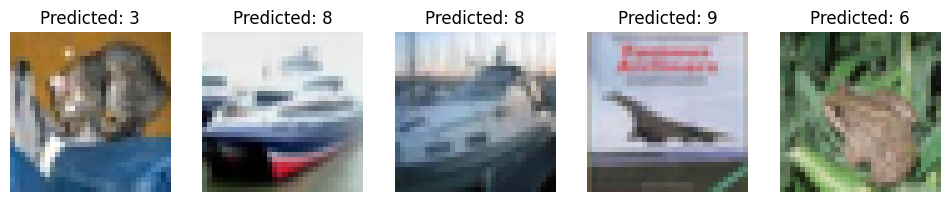

In [12]:
# Show some example predictions
num_examples = 5
predictions = model.predict(X_test[:num_examples])
predicted_labels = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(1, num_examples, figsize=(12, 3))
for i in range(num_examples):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Predicted: {}".format(predicted_labels[i]))
    axes[i].axis('off')

plt.show()

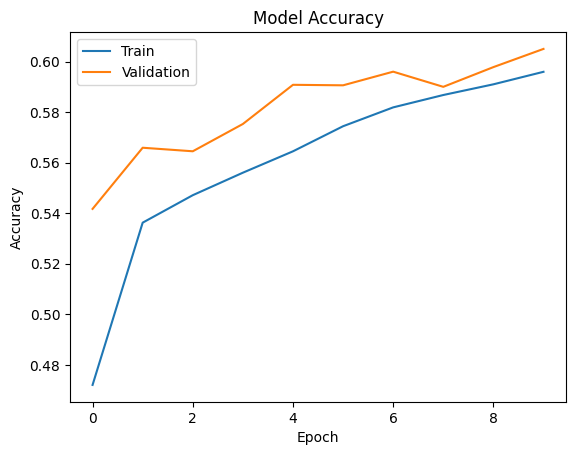

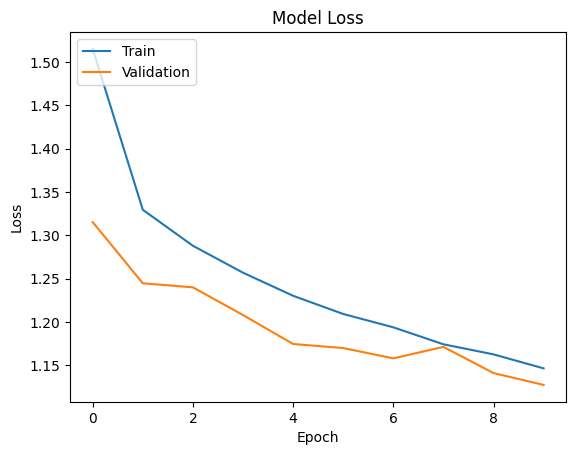

In [13]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
